<a href="https://colab.research.google.com/github/nagnimit03/Medical_Abstracts_Natural_Language_Processing/blob/main/NLPProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

PubMed Abstract - In this project I will be creating a Natural Language Processing model that can map a public medical abstracts to a pertinent label. In this project I will be replicating the model in the research paper https://arxiv.org/abs/1710.06071 and will try to beat the research's paper metrics by using Tensorflows. This dataset will be containing approximately 200,000 medical abstracts

Problem Statement - Whenever we come across a medical research paper and go through its public abstract it is difficult to interpret it as there are many technical terms present in the abstract. As a result we do not what is the background of the study , what methods they will be. using or what are the results and conclusions. These all make a medical abstract difficult to interpret.

Conclusion - If there is a model that can break the abstract of a research into several labels like background , method ,conclusion etc it would become readabble as well as easier to interpret. Thus , our goal here would be able to make a natural language processing that can solve a many to noe sequence problem and break down a medical abstract into labels making it readable and easier to interpret



In [ ]:
###getting the dataset
!git clone https://github.com/Franck-Dernoncourt/pubmed-rct.git
!ls pubmed-rct

Cloning into 'pubmed-rct'...
remote: Enumerating objects: 33, done.
remote: Counting objects: 100% (8/8), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 33 (delta 5), reused 5 (delta 5), pack-reused 25
Receiving objects: 100% (33/33), 177.08 MiB | 23.11 MiB/s, done.
Resolving deltas: 100% (12/12), done.
Updating files: 100% (13/13), done.
PubMed_200k_RCT
PubMed_200k_RCT_numbers_replaced_with_at_sign
PubMed_20k_RCT
PubMed_20k_RCT_numbers_replaced_with_at_sign
README.md


The difference between the files PubMed_200k_RCT and PubMed_200k_RCT_numbers_replaced_with_at_sign is as the name suggest , the files which contain numbers , those number have been replaced by @ sign as a part of pre-processing.

Now I will be defining a function to read all the data present in the text files. all the files contain 3 text files dev.txt , test.txt and train.txt. Since these files are in .txt format we will be writing a function that can read those text and labels asscoaited with each text

The function readFile reads a filename and returns the lines of text as a list

In [ ]:
def readFile(filename):
  with open(filename,"r") as file:
    return file.readlines()

In [ ]:
train_lines=readFile("/content/pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/train.txt")

In [ ]:
train_lines[:20]

['###24293578\n',
 'OBJECTIVE\tTo investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( OA ) .\n',
 'METHODS\tA total of @ patients with primary knee OA were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .\n',
 'METHODS\tOutcome measures included pain reduction and improvement in function scores and systemic inflammation markers .\n',
 'METHODS\tPain was assessed using the visual analog pain scale ( @-@ mm ) .\n',
 'METHODS\tSecondary outcome measures included the Western Ontario and McMaster Universities Osteoarthritis Index scores , patient global assessment ( PGA ) of the severity of knee OA , and @-min walk distance ( @MWD ) .\n',
 'METHODS\tSerum levels of interleukin @ ( IL-@ ) , IL-@ , tumor necrosis factor ( TNF ) - , and 

As per the data above we can see that each abstract begins with a unique identifer , most probably it should be an ID for eg -24854809.
Each abstracts ends with a new line character or /n characters.
Then we also observe that after each label is a tab space operator /t.



In [ ]:
sample = train_lines[:14]
test={}

In [ ]:
for i in sample:
  test["line_number"]:i

Now presenting the text file in a particular presentation has to be one of the biggest challege. Below is a method that takes in filename , reads the contents , sorts through each line , extracting things like the target labels , the text and how many sentences are in the particular abstract

In [ ]:

def preprocess_text_with_line_numbers(filename):


  input_lines = readFile(filename) # get all lines from filename
  abstract_lines = "" # create an empty abstract
  abstract_samples = [] # create an empty list of abstracts

  # Loop through each line in target file
  for line in input_lines:
    if line.startswith("###"): # check to see if line is an ID line
      abstract_id = line
      abstract_lines = "" # reset abstract string
    elif line.isspace(): # check to see if line is a new line
      abstract_line_split = abstract_lines.splitlines() # split abstract into separate lines

      # Iterate through each line in abstract and count them at the same time
      for abstract_line_number, abstract_line in enumerate(abstract_line_split):
        line_data = {} # create empty dict to store data from line
        target_text_split = abstract_line.split("\t") # split target label from text
        line_data["target"] = target_text_split[0] # get target label
        line_data["text"] = target_text_split[1].lower() # get target text and lower it
        line_data["line_number"] = abstract_line_number # what number line does the line appear in the abstract?
        line_data["total_lines"] = len(abstract_line_split) - 1 # how many total lines are in the abstract? (start from 0)
        abstract_samples.append(line_data) # add line data to abstract samples list

    else: # if the above conditions aren't fulfilled, the line contains a labelled sentence
      abstract_lines += line

  return abstract_samples

In [ ]:
preprocess_text_with_line_numbers("/content/pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/test.txt")

[{'target': 'BACKGROUND',
  'text': 'this study analyzed liver function abnormalities in heart failure patients admitted with severe acute decompensated heart failure ( adhf ) .',
  'line_number': 0,
  'total_lines': 8},
 {'target': 'RESULTS',
  'text': 'a post hoc analysis was conducted with the use of data from the evaluation study of congestive heart failure and pulmonary artery catheterization effectiveness ( escape ) .',
  'line_number': 1,
  'total_lines': 8},
 {'target': 'RESULTS',
  'text': 'liver function tests ( lfts ) were measured at @ time points from baseline , at discharge , and up to @ months follow-up .',
  'line_number': 2,
  'total_lines': 8},
 {'target': 'RESULTS',
  'text': 'survival analyses were used to assess the association between admission model of end-stage liver disease excluding international normalized ratio ( meld-xi ) scores and patient outcome.there was a high prevalence of abnormal baseline ( admission ) lfts ( albumin @ % , aspartate transaminase @ %

Now our data which is present in the file has been converted into list of dictionaries , we can convert it into a dataframe which will make it suitable for the model to read the data and find suitable patterns

In [ ]:
import pandas as pd
train_samples=preprocess_text_with_line_numbers("/content/pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/train.txt")
val_samples=preprocess_text_with_line_numbers("/content/pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/dev.txt")
test_samples=preprocess_text_with_line_numbers("/content/pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/test.txt")

In [ ]:
train_df=pd.DataFrame(train_samples)
val_df=pd.DataFrame(val_samples)
test_df=pd.DataFrame(test_samples)

In [ ]:
train_df.head(14)

,target,text,line_number,total_lines
0,OBJECTIVE,to investigate the efficacy of @ weeks of dail...,0,11
1,METHODS,a total of @ patients with primary knee oa wer...,1,11
2,METHODS,outcome measures included pain reduction and i...,2,11
3,METHODS,pain was assessed using the visual analog pain...,3,11
4,METHODS,secondary outcome measures included the wester...,4,11
5,METHODS,"serum levels of interleukin @ ( il-@ ) , il-@ ...",5,11
6,RESULTS,there was a clinically relevant reduction in t...,6,11
7,RESULTS,the mean difference between treatment arms ( @...,7,11
8,RESULTS,"further , there was a clinically relevant redu...",8,11
9,RESULTS,these differences remained significant at @ we...,9,11


In [ ]:
###checking the distribution of every label
train_df.target.value_counts()

METHODS        59353
RESULTS        57953
CONCLUSIONS    27168
BACKGROUND     21727
OBJECTIVE      13839
Name: target, dtype: int64

In [ ]:
### convert abstrat text into list
train_sentences=train_df["text"].tolist()
val_sentences=val_df["text"].tolist()
test_sentences=test_df["text"].tolist()

Making target column as numbers since ml models accept numbers

In [ ]:
 ### experimenting one hot encoding
 from sklearn.preprocessing import OneHotEncoder
 one_hot_encoder=OneHotEncoder(sparse=False)
 train_labels_one_hot=one_hot_encoder.fit_transform(train_df["target"].to_numpy().reshape(-1,1))###since it is 1d we need to convert it to numpy first then reshape it to -1,1 so that it can be in 2d
 val_labels_one_hot=one_hot_encoder.fit_transform(val_df["target"].to_numpy().reshape(-1,1))
 test_labels_one_hot=one_hot_encoder.fit_transform(test_df["target"].to_numpy().reshape(-1,1))


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
### extract labels and encode them into integers
from sklearn.preprocessing import LabelEncoder
labels_encoder=LabelEncoder()
train_labels_encoded=labels_encoder.fit_transform(train_df["target"].to_numpy().reshape(-1,1))###since it is 1d we need to convert it to numpy first then reshape it to -1,1 so that it can be in 2d
val_labels_encoded=labels_encoder.fit_transform(val_df["target"].to_numpy().reshape(-1,1))
test_labels_encoded=labels_encoder.fit_transform(test_df["target"].to_numpy().reshape(-1,1))


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
train_labels_encoded

array([3, 2, 2, ..., 4, 1, 1])

In [ ]:
train_labels_one_hot

array([[0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [ ]:
num_classes=labels_encoder.classes_


We are going to build a series of models.

Model 0 (Baseline) - Naive Bayes with TFIDF encoder ( baseline)

Model 1 - Conv 1D with token embeddings

Model 2 - Tensorflow hub pretrained freature extractor

Model 3 - Conv 1D with character embeddings

Model 4 - asme as model 2 but with character embeddings

Model 5 - Pretrained token embeddings + character embeddings+ positional embeddings

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

### create a pipeline

model_0=Pipeline(
    [
        ("tf-idf",TfidfVectorizer()),
        ("clf",MultinomialNB())
    ]
)

model_0.fit(train_sentences,
            train_labels_encoded,
)

Pipeline(steps=[('tf-idf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [ ]:
model_0.score(val_sentences,val_labels_encoded)

0.7218323844829869

In [ ]:
###make predictions
baseline_preds=model_0.predict(val_sentences)
baseline_preds

array([4, 1, 3, ..., 4, 4, 1])

In [ ]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
def getMetrics(true_labels,pred_labels):
  result_dict={}
  result_dict['Accuracy']=accuracy_score(true_labels,pred_labels)
  result_dict['Precision_Score']=precision_score(true_labels,pred_labels,average='weighted')
  result_dict['Recall_Score']=recall_score(true_labels,pred_labels,average='weighted')
  result_dict['F1_Score']=f1_score(true_labels,pred_labels,average='weighted')
  return result_dict

In [ ]:
baseline_results=getMetrics(val_labels_encoded,baseline_preds)

In [ ]:
baseline_results

{'Accuracy': 0.7218323844829869,
 'Precision_Score': 0.7186466952323352,
 'Recall_Score': 0.7218323844829869,
 'F1_Score': 0.6989250353450294}

Preparing the data for deep learning model. Now we will be converting text into vectors and create embeddings.

In [ ]:
import numpy as np
import tensorflow as tf

In [ ]:
###finding the average length of train_sentences for text vecotrizer
sentence_length=[len(sentence.split())for sentence in train_sentences]
average_sentence_length=np.mean(sentence_length)
average_sentence_length

26.338269273494777

(array([4.2075e+04, 8.3771e+04, 3.6877e+04, 1.0945e+04, 3.9310e+03,
        1.4450e+03, 5.6000e+02, 2.2600e+02, 1.0100e+02, 4.5000e+01,
        2.0000e+01, 1.2000e+01, 9.0000e+00, 1.0000e+01, 6.0000e+00,
        2.0000e+00, 3.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00]),
 array([  1.  ,  15.75,  30.5 ,  45.25,  60.  ,  74.75,  89.5 , 104.25,
        119.  , 133.75, 148.5 , 163.25, 178.  , 192.75, 207.5 , 222.25,
        237.  , 251.75, 266.5 , 281.25, 296.  ]),
 <BarContainer object of 20 artists>)

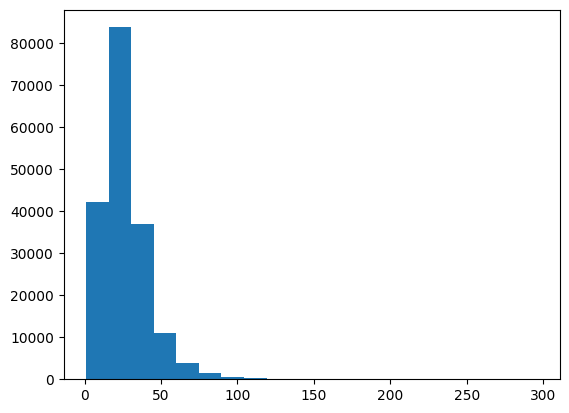

In [ ]:
####let's check the distribution for sentence length
import matplotlib.pyplot as plt
plt.hist(sentence_length,bins=20)

In [ ]:
output_sequence_length=int(np.percentile(sentence_length,95))

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

In [ ]:
text_vectorizer=TextVectorization(
    max_tokens=68000,
    standardize="lower_and_strip_punctuation",
    split='whitespace',
    ngrams=None,
    output_mode='int',
    output_sequence_length=output_sequence_length,
    pad_to_max_tokens=True
)

text_vectorizer.adapt(train_sentences)

In [ ]:
import random as random
random_sentence=random.sample(train_sentences,1)
print("Random Sentence: "+str(random_sentence))
text_vectorizer(random_sentence)

Random Sentence: ['subjective treatment satisfaction ( completely satisfied with the procedure ) was significantly higher in the tvt group ( @ % ) than in the lcm group ( @ % ) .']


<tf.Tensor: shape=(1, 55), dtype=int64, numpy=
array([[  822,    19,   428,  3016,  2766,     7,     2,   407,    10,
           39,    82,     5,     2,  6459,    13,    42,     5,     2,
        22698,    13,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0]])>

In [ ]:
vocabulary=text_vectorizer.get_vocabulary()

In [ ]:
len(vocabulary)

64841

In [ ]:
vocabulary[:5]

['', '[UNK]', 'the', 'and', 'of']

In [ ]:
vocabulary[-5:]

['aainduced', 'aaigroup', 'aachener', 'aachen', 'aaacp']

In [ ]:
### create custom text embedding
from tensorflow.keras.layers import Embedding
embedding=Embedding(
    input_dim=68000,
    output_dim=128,
    mask_zero=True
)

In [ ]:
embedding(text_vectorizer(random_sentence))

<tf.Tensor: shape=(1, 55, 128), dtype=float32, numpy=
array([[[ 0.02408241,  0.01439227,  0.03022904, ...,  0.03435515,
         -0.01528226,  0.0367718 ],
        [ 0.0433842 ,  0.03084253,  0.01993508, ...,  0.03535536,
         -0.03274985, -0.03977642],
        [-0.0085037 , -0.0303432 , -0.01499733, ..., -0.04500775,
         -0.01232059, -0.01441879],
        ...,
        [-0.04472245,  0.04571957, -0.0366091 , ...,  0.00202725,
         -0.03259178,  0.00123016],
        [-0.04472245,  0.04571957, -0.0366091 , ...,  0.00202725,
         -0.03259178,  0.00123016],
        [-0.04472245,  0.04571957, -0.0366091 , ...,  0.00202725,
         -0.03259178,  0.00123016]]], dtype=float32)>

GPUs and TPUs can radically reduce the time required to execute a single training step. Achieving peak performance requires an efficient input pipeline that delivers data for the next step before the current step has finished

So we will be using tf.data api to create our train datasets from the exisitng datasets we have but only difference would be the new ones would load very fast and help us to achieve the best performance. Also one more thing is I will using one hot encoded labels for now

In [ ]:
train_dataset=tf.data.Dataset.from_tensor_slices((train_sentences,train_labels_one_hot))
validation_dataset=tf.data.Dataset.from_tensor_slices((val_sentences,val_labels_one_hot))
test_dataset=tf.data.Dataset.from_tensor_slices((test_sentences,test_labels_one_hot))

In [ ]:
train_dataset=train_dataset.batch(32).prefetch(tf.data.AUTOTUNE)
validation_dataset=validation_dataset.batch(32).prefetch(tf.data.AUTOTUNE)
test_dataset=test_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

Creating Model 1 which is Conv 1d model with token embeddings.

In [ ]:
inputs=tf.keras.layers.Input(shape=(1,),dtype=tf.string)
text_vectors=text_vectorizer(inputs)
token_embeddings=embedding(text_vectors)
x=tf.keras.layers.Conv1D(
    filters=64,
    kernel_size=5,
    padding="same",
    activation="relu"
)(token_embeddings)
x=tf.keras.layers.GlobalAveragePooling1D()(x)
outputs=tf.keras.layers.Dense(5,activation="softmax")(x)
model_1=tf.keras.Model(inputs,outputs)

In [ ]:
model_1.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics="accuracy",
    run_eagerly=True
)

In [ ]:
model_1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization (TextVec  (None, 55)               0         
 torization)                                                     
                                                                 
 embedding (Embedding)       (None, 55, 128)           8704000   
                                                                 
 conv1d (Conv1D)             (None, 55, 64)            41024     
                                                                 
 global_average_pooling1d (G  (None, 64)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 5)                 325   

In [ ]:
history_1=model_1.fit(
    train_dataset,
    epochs=5,
    steps_per_epoch=int(0.10*len(train_dataset)),
    validation_data=validation_dataset,
    validation_steps=int(0.10*len(validation_dataset))
)

Epoch 1/5


  1/562 [..............................] - ETA: 1:35:12 - loss: 1.6007 - accuracy: 0.4062

562/562 [==============================] - 73s 111ms/step - loss: 0.9081 - accuracy: 0.6447 - val_loss: 0.6826 - val_accuracy: 0.7394
Epoch 2/5
562/562 [==============================] - 33s 58ms/step - loss: 0.6584 - accuracy: 0.7551 - val_loss: 0.6329 - val_accuracy: 0.7699
Epoch 3/5
562/562 [==============================] - 28s 49ms/step - loss: 0.6192 - accuracy: 0.7740 - val_loss: 0.5981 - val_accuracy: 0.7829
Epoch 4/5
562/562 [==============================] - 26s 46ms/step - loss: 0.5906 - accuracy: 0.7874 - val_loss: 0.5792 - val_accuracy: 0.7902
Epoch 5/5
562/562 [==============================] - 28s 49ms/step - loss: 0.5916 - accuracy: 0.7906 - val_loss: 0.5620 - val_accuracy: 0.7975


In [ ]:
model_1.evaluate(validation_dataset)

945/945 [==============================] - 24s 26ms/step - loss: 0.5617 - accuracy: 0.8014


[0.5617234110832214, 0.8014365434646606]

In [ ]:
model_1_preds=model_1.predict(validation_dataset)
model_1_preds

945/945 [==============================] - 14s 15ms/step


array([[5.5244303e-01, 1.8294212e-01, 5.1704846e-02, 1.6801359e-01,
        4.4896450e-02],
       [4.2385006e-01, 3.6033460e-01, 3.0687604e-02, 1.3979264e-01,
        4.5335174e-02],
       [1.9429570e-01, 4.5383153e-03, 1.4409701e-03, 7.9966915e-01,
        5.5815570e-05],
       ...,
       [4.2181757e-05, 9.2679990e-04, 4.2395731e-03, 3.4409335e-05,
        9.9475706e-01],
       [9.3783826e-02, 3.2522407e-01, 1.5994734e-01, 6.9986925e-02,
        3.5105783e-01],
       [1.5916680e-01, 7.7497840e-01, 3.6901470e-02, 9.6674198e-03,
        1.9285971e-02]], dtype=float32)

In [ ]:
model_1_preds[0]

array([0.552443  , 0.18294212, 0.05170485, 0.16801359, 0.04489645],
      dtype=float32)

In [ ]:
model_1_predictions=tf.argmax(model_1_preds,axis=1)

In [ ]:
model_1_result=getMetrics(val_labels_encoded,model_1_predictions)

In [ ]:
model_1_result

{'Accuracy': 0.8014365152919369,
 'Precision_Score': 0.8024530434354586,
 'Recall_Score': 0.8014365152919369,
 'F1_Score': 0.7984955006659291}

Model 2 Feature extraction with Pretrained embeddings

We will beusing pretrained embeddings from tensorflow hub https://tfhub.dev/google/universal-sentence-encoder/4

USE accepts a list as an input so we will be giving an empty list in the shape

In [ ]:
import tensorflow_hub as hub
tf_hub_embedding_layer=hub.KerasLayer(
    "https://tfhub.dev/google/universal-sentence-encoder/4",
    trainable=False
)


In [ ]:
inputs=tf.keras.layers.Input(shape=[],dtype=tf.string)
pretrained_embeding=tf_hub_embedding_layer(inputs)
x=tf.keras.layers.Dense(128,activation="relu")(pretrained_embeding)
outputs=tf.keras.layers.Dense(len(num_classes),activation="softmax")(x)
model_2=tf.keras.Model(inputs,outputs)

In [ ]:
model_2.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

In [ ]:
model_2.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None,)]                 0         
                                                                 
 keras_layer (KerasLayer)    (None, 512)               256797824 
                                                                 
 dense_1 (Dense)             (None, 128)               65664     
                                                                 
 dense_2 (Dense)             (None, 5)                 645       
                                                                 
Total params: 256,864,133
Trainable params: 66,309
Non-trainable params: 256,797,824
_________________________________________________________________


In [ ]:
history_model_2=model_2.fit(
    train_dataset,
    epochs=5,
    validation_data=validation_dataset,
    steps_per_epoch=int(0.10*len(train_dataset)),
    validation_steps=int(0.10*len(validation_dataset))
)

Epoch 1/5
562/562 [==============================] - 15s 18ms/step - loss: 0.9123 - accuracy: 0.6508 - val_loss: 0.7952 - val_accuracy: 0.6902
Epoch 2/5
562/562 [==============================] - 9s 16ms/step - loss: 0.7686 - accuracy: 0.7012 - val_loss: 0.7556 - val_accuracy: 0.7045
Epoch 3/5
562/562 [==============================] - 10s 17ms/step - loss: 0.7537 - accuracy: 0.7117 - val_loss: 0.7384 - val_accuracy: 0.7098
Epoch 4/5
562/562 [==============================] - 10s 18ms/step - loss: 0.7191 - accuracy: 0.7246 - val_loss: 0.7105 - val_accuracy: 0.7297
Epoch 5/5
562/562 [==============================] - 10s 18ms/step - loss: 0.7254 - accuracy: 0.7229 - val_loss: 0.6883 - val_accuracy: 0.7360


In [ ]:
model_2.evaluate(validation_dataset)

945/945 [==============================] - 13s 14ms/step - loss: 0.6957 - accuracy: 0.7368


[0.6956823468208313, 0.7367933392524719]

In [ ]:
model_2_preds=model_2.predict(validation_dataset)
model_2_prediction=tf.argmax(model_2_preds,axis=1)

945/945 [==============================] - 13s 13ms/step


In [ ]:
model_2_prediction

<tf.Tensor: shape=(30212,), dtype=int64, numpy=array([0, 1, 3, ..., 4, 2, 2])>

In [ ]:
model_2_result=getMetrics(val_labels_encoded,model_2_prediction)

In [ ]:
model_2_result

{'Accuracy': 0.736793327154773,
 'Precision_Score': 0.7331837029479534,
 'Recall_Score': 0.736793327154773,
 'F1_Score': 0.7310845106817808}

MOdel 3: Conv 1 D
Now I will be implementing character level embedding. Previosly we have been using character level embeddings.
Each character will be assigned a random value in character level embedding rather than token where each word gets assigned witha random value.

So we will be formatting our data a t acharacterlevle

In [ ]:
### creating a character level tokenizzer
train_sentences[:5]

['to investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( oa ) .',
 'a total of @ patients with primary knee oa were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .',
 'outcome measures included pain reduction and improvement in function scores and systemic inflammation markers .',
 'pain was assessed using the visual analog pain scale ( @-@ mm ) .',
 'secondary outcome measures included the western ontario and mcmaster universities osteoarthritis index scores , patient global assessment ( pga ) of the severity of knee oa , and @-min walk distance ( @mwd ) .']

In [ ]:
def split_chars(text):
  return " ".join(list(text))

In [ ]:
train_chars=[split_chars(sentence) for sentence in train_sentences]
validation_chars=[split_chars(sentence) for sentence in val_sentences]
test_chars=[split_chars(sentence) for sentence in test_sentences]

In [ ]:
####average character length
### the difference between in fimnding sverage character and word length
## is .split method
chars_length=[len(sentence) for sentence in train_sentences]
mean_chars_length=np.mean(chars_length)
mean_chars_length

149.3662574983337

(array([1.41175e+05, 3.71110e+04, 1.60000e+03, 1.27000e+02, 2.10000e+01,
        5.00000e+00, 1.00000e+00]),
 array([1.00000000e+00, 1.98857143e+02, 3.96714286e+02, 5.94571429e+02,
        7.92428571e+02, 9.90285714e+02, 1.18814286e+03, 1.38600000e+03]),
 <BarContainer object of 7 artists>)

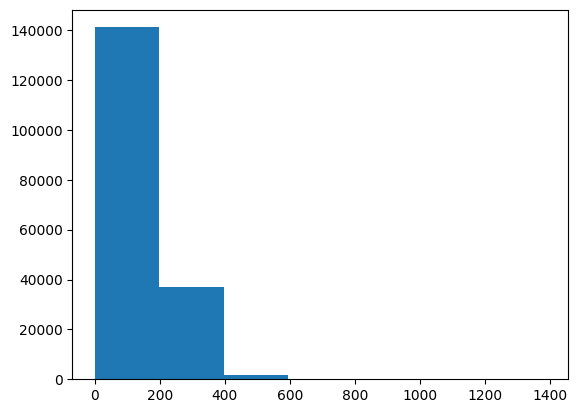

In [ ]:
plt.hist(chars_length,bins=7)

In [ ]:
output_seq_char_lens=np.percentile(chars_length,95)
output_seq_char_lens

290.0

Earlier we were using word level tokenizer so we used 68000 as our max token. But for character what we would be doing is getting all the characters in english language finding the length of it and then using that length as the maximum length in our instantion.

In [ ]:
import string
alphabet=string.ascii_lowercase+string.digits+string.punctuation
alphabet
len(alphabet)

68

In [ ]:
#### create char level tokenizer
char_vectorizer=TextVectorization(
    max_tokens=len(alphabet)+2,
    standardize="lower_and_strip_punctuation",
    split="whitespace",
    output_mode="int",
    output_sequence_length=int(output_seq_char_lens),
    pad_to_max_tokens=True,
    ngrams=None
)

char_vectorizer.adapt(train_chars)

In [ ]:
character_embedding=tf.keras.layers.Embedding(
    input_dim=len(alphabet),
    output_dim=128,
    mask_zero=True
)

In [ ]:
inputs=tf.keras.layers.Input(shape=(1,),dtype=tf.string)
x=char_vectorizer(inputs)
x=character_embedding(x)
x=tf.keras.layers.Conv1D(
    filters=64,
    kernel_size=5,
    padding="same",
    activation="relu"
)(x)
x=tf.keras.layers.GlobalMaxPooling1D()(x)
outputs=tf.keras.layers.Dense(len(num_classes),activation="softmax")(x)
model_3=tf.keras.Model(inputs,outputs)

In [ ]:
model_3.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

In [ ]:
model_3.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 290)              0         
 ectorization)                                                   
                                                                 
 embedding_1 (Embedding)     (None, 290, 128)          8704      
                                                                 
 conv1d_1 (Conv1D)           (None, 290, 64)           41024     
                                                                 
 global_max_pooling1d (Globa  (None, 64)               0         
 lMaxPooling1D)                                                  
                                                                 
 dense_3 (Dense)             (None, 5)                 325 

In [ ]:
train_chars_dataset=tf.data.Dataset.from_tensor_slices((train_chars,train_labels_one_hot)).batch(32).prefetch(tf.data.AUTOTUNE)
validation_chars_dataset=tf.data.Dataset.from_tensor_slices((validation_chars,val_labels_one_hot)).batch(32).prefetch(tf.data.AUTOTUNE)
test_chars_dataset=tf.data.Dataset.from_tensor_slices((test_chars,test_labels_one_hot)).batch(32).prefetch(tf.data.AUTOTUNE)


In [ ]:
history_model_3=model_3.fit(
    train_chars_dataset,
    epochs=5,
    validation_data=validation_chars_dataset,
    steps_per_epoch=int(0.10*len(train_chars_dataset)),
    validation_steps=int(0.10*len(validation_chars_dataset))
)

Epoch 1/5
562/562 [==============================] - 6s 9ms/step - loss: 1.1425 - accuracy: 0.5475 - val_loss: 0.9351 - val_accuracy: 0.6386
Epoch 2/5
562/562 [==============================] - 5s 8ms/step - loss: 0.9167 - accuracy: 0.6398 - val_loss: 0.8588 - val_accuracy: 0.6682
Epoch 3/5
562/562 [==============================] - 4s 8ms/step - loss: 0.8631 - accuracy: 0.6654 - val_loss: 0.8107 - val_accuracy: 0.6848
Epoch 4/5
562/562 [==============================] - 4s 8ms/step - loss: 0.8275 - accuracy: 0.6805 - val_loss: 0.7802 - val_accuracy: 0.7048
Epoch 5/5
562/562 [==============================] - 5s 8ms/step - loss: 0.8164 - accuracy: 0.6864 - val_loss: 0.7742 - val_accuracy: 0.7035


In [ ]:
model_3_preds=model_3.predict(validation_chars_dataset)

945/945 [==============================] - 4s 4ms/step


In [ ]:
model_3_predictions=tf.argmax(model_3_preds,axis=1)

In [ ]:
model_3_results=getMetrics(val_labels_encoded,model_3_predictions)

In [ ]:
model_3_results

{'Accuracy': 0.6952535416390838,
 'Precision_Score': 0.7011997348942609,
 'Recall_Score': 0.6952535416390838,
 'F1_Score': 0.6964156499074055}

Building Model 4: This model will contain both character and token embeddings.
Now previously we have created them and used them individually but now we we will creating a multi modal model.
Now since we will be using token and character embedding both , it is a high chance that model reaches overfitting. To prevent that we add an arguement dropout which mean that some parameteres learned , we remove the parameteres that model learned as if they were never part of the architecture.

In [ ]:
### creating a token level embedding
token_inputs=tf.keras.layers.Input([],dtype=tf.string)
token_embeddings=tf_hub_embedding_layer(token_inputs)
token_output=tf.keras.layers.Dense(128,activation="relu")(token_embeddings)
token_model=tf.keras.Model(token_inputs,token_output)

###creating character level
char_inputs=tf.keras.layers.Input(shape=(1,),dtype=tf.string)
char_vectors=char_vectorizer(char_inputs)
char_embeds=character_embedding(char_vectors)
char_bi_lstm=tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64))(char_embeds)
char_model=tf.keras.Model(char_inputs,char_bi_lstm)

###concatenate token and char embeding
token_char_concatenate=tf.keras.layers.Concatenate()([
    token_model.output,char_model.output
])
###adding dropouts
combined_dropout=tf.keras.layers.Dropout(0.5)(token_char_concatenate)
combined_dense=tf.keras.layers.Dense(128,activation="relu")(combined_dropout)
final_dropout=tf.keras.layers.Dropout(0.5)(combined_dense)
output_layer=tf.keras.layers.Dense(len(num_classes),activation="softmax")(final_dropout)

###creating model
model_4=tf.keras.Model(inputs=[
    token_model.input,
    char_model.input
],outputs=output_layer)

In [ ]:
model_4.summary()

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 1)]          0           []                               
                                                                                                  
 input_4 (InputLayer)           [(None,)]            0           []                               
                                                                                                  
 text_vectorization_1 (TextVect  (None, 290)         0           ['input_5[0][0]']                
 orization)                                                                                       
                                                                                                  
 keras_layer (KerasLayer)       (None, 512)          256797824   ['input_4[0][0]']          

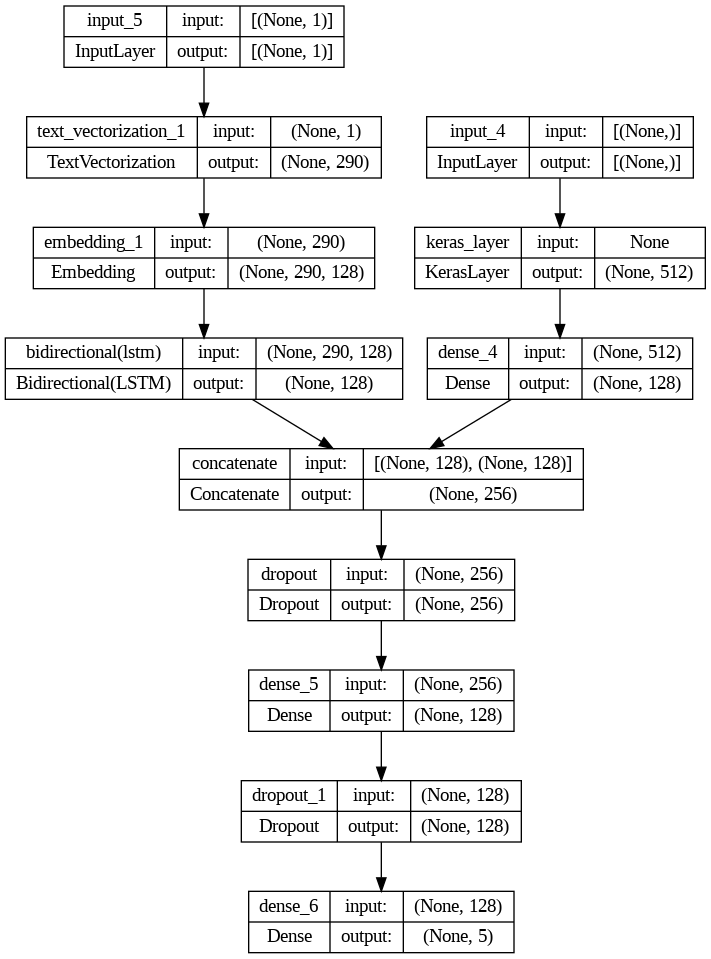

In [ ]:
from keras.utils import plot_model
plot_model(model_4,show_shapes=True)

In [ ]:
model_4.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

In [ ]:
##combining token and character into a dataset
train_chars_token_data=tf.data.Dataset.from_tensor_slices((train_sentences,train_chars))
train_chars_token_labels=tf.data.Dataset.from_tensor_slices((train_labels_one_hot))
train_chars_token_dataset=tf.data.Dataset.zip((train_chars_token_data,train_chars_token_labels))
train_chars_token_dataset=train_chars_token_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

In [ ]:
validation_chars_token_data=tf.data.Dataset.from_tensor_slices((val_sentences,validation_chars))
validation_chars_token_labels=tf.data.Dataset.from_tensor_slices((val_labels_one_hot))
validation_chars_token_dataset=tf.data.Dataset.zip((validation_chars_token_data,validation_chars_token_labels))
validation_chars_token_dataset=validation_chars_token_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

In [ ]:
test_chars_token_data=tf.data.Dataset.from_tensor_slices((test_sentences,test_chars))
test_chars_token_labels=tf.data.Dataset.from_tensor_slices((test_labels_one_hot))
test_chars_token_dataset=tf.data.Dataset.zip((test_chars_token_data,test_chars_token_labels))
test_chars_token_dataset=test_chars_token_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

In [ ]:
history_model_4=model_4.fit(
    train_chars_token_dataset,
    epochs=5,
    validation_data=validation_chars_token_dataset,
    validation_steps=int(0.10*len(validation_chars_token_dataset)),
    steps_per_epoch=int(0.10*len(train_chars_token_dataset))
)

Epoch 1/5
562/562 [==============================] - 45s 59ms/step - loss: 0.9668 - accuracy: 0.6154 - val_loss: 0.7672 - val_accuracy: 0.7051
Epoch 2/5
562/562 [==============================] - 30s 53ms/step - loss: 0.7850 - accuracy: 0.6961 - val_loss: 0.6997 - val_accuracy: 0.7311
Epoch 3/5
562/562 [==============================] - 28s 50ms/step - loss: 0.7637 - accuracy: 0.7079 - val_loss: 0.6798 - val_accuracy: 0.7424
Epoch 4/5
562/562 [==============================] - 33s 59ms/step - loss: 0.7325 - accuracy: 0.7243 - val_loss: 0.6532 - val_accuracy: 0.7543
Epoch 5/5
562/562 [==============================] - 29s 51ms/step - loss: 0.7348 - accuracy: 0.7206 - val_loss: 0.6527 - val_accuracy: 0.7553


In [ ]:
 model_4.evaluate(validation_chars_token_dataset)

945/945 [==============================] - 24s 25ms/step - loss: 0.6605 - accuracy: 0.7454


[0.6604515314102173, 0.7454322576522827]

In [ ]:
model_4_pred_probs=model_4.predict(validation_chars_token_dataset)
model_4_predictions=tf.argmax(model_4_pred_probs,axis=1)
model_4_results=getMetrics(val_labels_encoded,model_4_predictions)
model_4_results

945/945 [==============================] - 25s 24ms/step


{'Accuracy': 0.7454322785648086,
 'Precision_Score': 0.7432689075188655,
 'Recall_Score': 0.7454322785648086,
 'F1_Score': 0.739963837723155}

Now I will be working with Positional embeddings. In positional embeddings , we introduce predefined rules. So when I say predefined rules what I mean is , in each abstract it will start from either an objective or a background and definitely it will end with a conclusion.
So that's why we created a dataframne like that which contained line numbers and abstract numbers.

In model 5 we will be working with pretrained token bedding , character embedings and positional embeddings

In [ ]:
#### create positional embeddings
train_df[:10]

,target,text,line_number,total_lines
0,OBJECTIVE,to investigate the efficacy of @ weeks of dail...,0,11
1,METHODS,a total of @ patients with primary knee oa wer...,1,11
2,METHODS,outcome measures included pain reduction and i...,2,11
3,METHODS,pain was assessed using the visual analog pain...,3,11
4,METHODS,secondary outcome measures included the wester...,4,11
5,METHODS,"serum levels of interleukin @ ( il-@ ) , il-@ ...",5,11
6,RESULTS,there was a clinically relevant reduction in t...,6,11
7,RESULTS,the mean difference between treatment arms ( @...,7,11
8,RESULTS,"further , there was a clinically relevant redu...",8,11
9,RESULTS,these differences remained significant at @ we...,9,11


In [ ]:
train_df["line_number"].value_counts()

0     15000
1     15000
2     15000
3     15000
4     14992
5     14949
6     14758
7     14279
8     13346
9     11981
10    10041
11     7892
12     5853
13     4152
14     2835
15     1861
16     1188
17      751
18      462
19      286
20      162
21      101
22       66
23       33
24       22
25       14
26        7
27        4
28        3
29        1
30        1
Name: line_number, dtype: int64

(array([1.5000e+04, 1.5000e+04, 1.5000e+04, 1.5000e+04, 1.4992e+04,
        1.4949e+04, 1.4758e+04, 1.4279e+04, 1.3346e+04, 1.1981e+04,
        1.0041e+04, 7.8920e+03, 5.8530e+03, 4.1520e+03, 2.8350e+03,
        1.8610e+03, 1.1880e+03, 7.5100e+02, 4.6200e+02, 2.8600e+02,
        1.6200e+02, 1.0100e+02, 6.6000e+01, 3.3000e+01, 2.2000e+01,
        1.4000e+01, 7.0000e+00, 4.0000e+00, 3.0000e+00, 2.0000e+00]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
        26., 27., 28., 29., 30.]),
 <BarContainer object of 30 artists>)

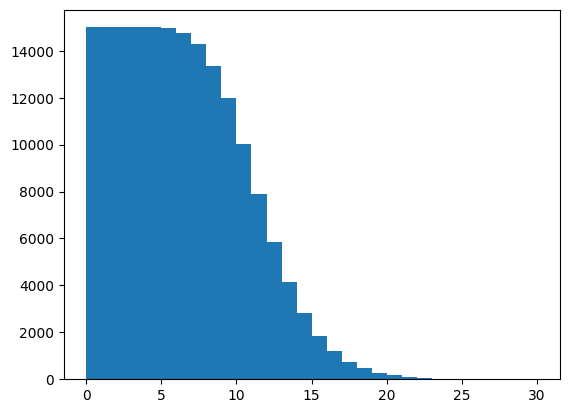

In [ ]:
plt.hist(train_df["line_number"],bins=30)

From the above distribution and grphs we see that if we hot encode the lin numbers we can choose the depth as 20 , this way it will save us some time to compute and also we will be missing out only on few portions of the data

In [ ]:
train_line_numbers_one_hot=tf.one_hot(train_df["line_number"].to_numpy(),depth=20)

In [ ]:
validation_line_numbers_one_hot=tf.one_hot(val_df["line_number"].to_numpy(),depth=20)

In [ ]:
test_line_numbers_one_hot=tf.one_hot(test_df["line_number"].to_numpy(),depth=20)

In [ ]:
###doing the asme for total lines
train_df["total_lines"].value_counts()

11    24468
10    23639
12    22113
9     19400
13    18438
14    14610
8     12285
15    10768
7      7464
16     7429
17     5202
6      3353
18     3344
19     2480
20     1281
5      1146
21      770
22      759
23      264
4       215
24      200
25      182
26       81
28       58
3        32
30       31
27       28
Name: total_lines, dtype: int64

(array([2.4700e+02, 1.1460e+03, 1.0817e+04, 1.2285e+04, 1.9400e+04,
        4.8107e+04, 2.2113e+04, 1.8438e+04, 2.5378e+04, 7.4290e+03,
        5.2020e+03, 5.8240e+03, 1.2810e+03, 7.7000e+02, 1.0230e+03,
        2.0000e+02, 1.8200e+02, 1.0900e+02, 5.8000e+01, 3.1000e+01]),
 array([ 3.  ,  4.35,  5.7 ,  7.05,  8.4 ,  9.75, 11.1 , 12.45, 13.8 ,
        15.15, 16.5 , 17.85, 19.2 , 20.55, 21.9 , 23.25, 24.6 , 25.95,
        27.3 , 28.65, 30.  ]),
 <BarContainer object of 20 artists>)

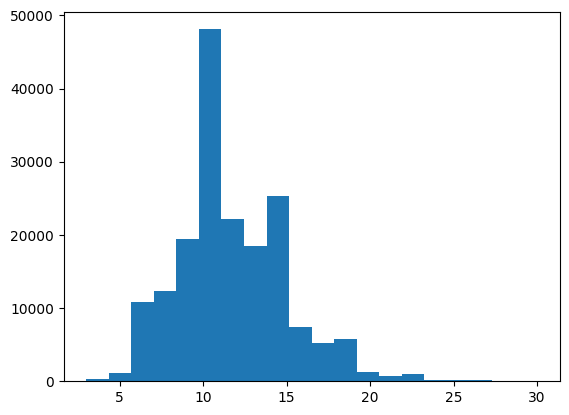

In [ ]:
plt.hist(train_df["total_lines"].to_numpy(),bins=20)

In [ ]:
train_total_line_numbers_one_hot=tf.one_hot(train_df["total_lines"].to_numpy(),depth=20)

In [ ]:
validation_total_line_numbers_one_hot=tf.one_hot(val_df["total_lines"].to_numpy(),depth=20)

In [ ]:
test_total_line_numbers_one_hot=tf.one_hot(test_df["total_lines"].to_numpy(),depth=20)

 **Building Model 5**

In [ ]:
### Step 1 - Create pre trained token embedding
token_inputs=tf.keras.layers.Input([],dtype=tf.string)
token_embed=tf_hub_embedding_layer(token_inputs)
token_outputs=tf.keras.layers.Dense(128,activation="relu")(token_embed)
token_model=tf.keras.Model(token_inputs,token_outputs)

### Step 2 - Create character embedding model
char_input=tf.keras.layers.Input(shape=(1,),dtype=tf.string)
character_vectorizer=char_vectorizer(char_input)
char_embedding=character_embedding(character_vectorizer)
char_output=tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64))(char_embedding)
char_model=tf.keras.Model(char_input,char_output)

### step 3 - creating model for line number
line_number_inputs=tf.keras.layers.Input(shape=(20,),dtype=tf.float32)
x=tf.keras.layers.Dense(128,activation="relu")(line_number_inputs)
line_number_model=tf.keras.Model(line_number_inputs,x)

### step 4 - creating model for total lines model
total_lines_inputs=tf.keras.layers.Input(shape=(20,),dtype=tf.float32)
y=tf.keras.layers.Dense(128,activation="relu")(total_lines_inputs)
total_line_model=tf.keras.Model(total_lines_inputs,y)

### step 5 - combine token and char embeding into hybrid embedding
combined_embeddings=tf.keras.layers.Concatenate()([
    token_model.output,
    char_model.output
])
combined_dropout=tf.keras.layers.Dropout(0.5)(combined_embeddings)

### step 6 - combine this with positional embeddings
custom_embedding=tf.keras.layers.Concatenate()([
    line_number_model.output,
    total_line_model.output,
    combined_dropout
])


### step 7 - create output layers
output_layer=tf.keras.layers.Dense(5,activation="softmax")(custom_embedding)

###creating model
model_5=tf.keras.Model([
    line_number_model.input,
    total_line_model.input,
    token_model.input,
    char_model.input
],output_layer)

In [ ]:
model_5.summary()

Model: "model_10"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_7 (InputLayer)           [(None, 1)]          0           []                               
                                                                                                  
 input_6 (InputLayer)           [(None,)]            0           []                               
                                                                                                  
 text_vectorization_1 (TextVect  (None, 290)         0           ['input_7[0][0]']                
 orization)                                                                                       
                                                                                                  
 keras_layer (KerasLayer)       (None, 512)          256797824   ['input_6[0][0]']         

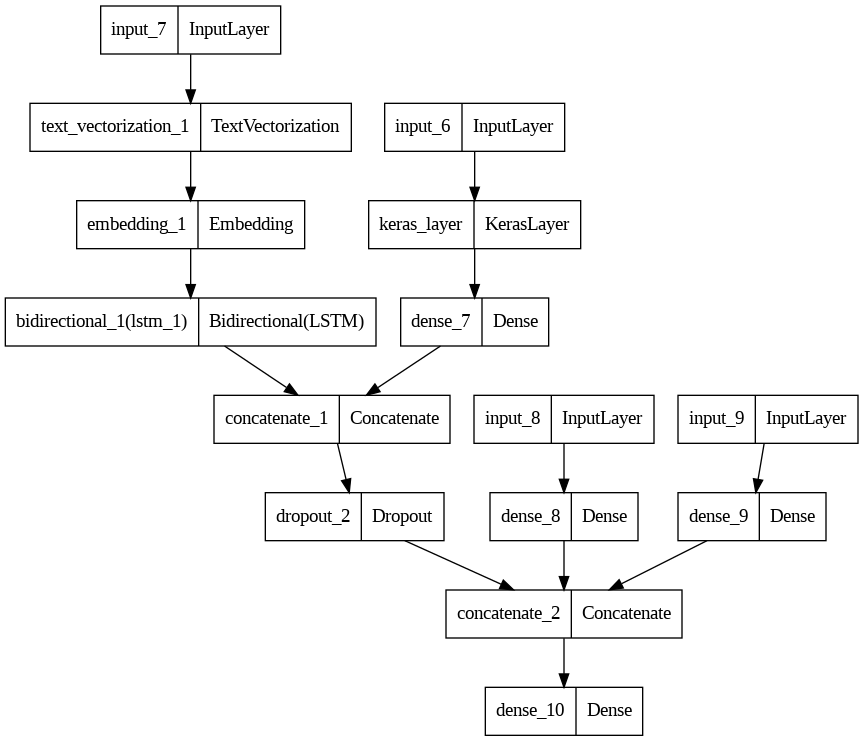

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model_5)

Label smoothing helps us to prevent overfitting. if the probability of selection of one class is really high , model may not consider other classes and gets stuck on that particular class.
So label smoothing assigns some of the value from the highest probability class to other classes , in turn hopefully improving generalization.

In [ ]:
model_5.compile(loss=tf.keras.losses.CategoricalCrossentropy(label_smoothing=0.2),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])



In [ ]:
### creating training and validation pipelines with all 4 kinds of input
train_char_token_pos_data=tf.data.Dataset.from_tensor_slices((train_line_numbers_one_hot,
                                                              train_total_line_numbers_one_hot,
                                                              train_sentences,
                                                              train_chars))
train_char_token_pos_labels=tf.data.Dataset.from_tensor_slices((train_labels_one_hot))
train_char_token_pos_dataset=tf.data.Dataset.zip((train_char_token_pos_data,train_char_token_pos_labels))
train_char_token_pos_dataset=train_char_token_pos_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

In [ ]:
validation_char_token_pos_data=tf.data.Dataset.from_tensor_slices((validation_line_numbers_one_hot,
                                                              validation_total_line_numbers_one_hot,
                                                              val_sentences,
                                                              validation_chars))
validation_char_token_pos_labels=tf.data.Dataset.from_tensor_slices((val_labels_one_hot))
validation_char_token_pos_dataset=tf.data.Dataset.zip((validation_char_token_pos_data,validation_char_token_pos_labels))
validation_char_token_pos_dataset=validation_char_token_pos_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

In [ ]:
test_char_token_pos_data=tf.data.Dataset.from_tensor_slices((test_line_numbers_one_hot,
                                                              test_total_line_numbers_one_hot,
                                                              test_sentences,
                                                              test_chars))
test_char_token_pos_labels=tf.data.Dataset.from_tensor_slices((test_labels_one_hot))
test_char_token_pos_dataset=tf.data.Dataset.zip((test_char_token_pos_data,test_char_token_pos_labels))
test_char_token_pos_dataset=test_char_token_pos_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

In [ ]:
history_model_5=model_5.fit(
    train_char_token_pos_dataset,
    epochs=5,
    steps_per_epoch=int(0.10*len(train_char_token_pos_dataset)),
    validation_data=validation_char_token_pos_dataset,
    validation_steps=int(0.10*len(validation_char_token_pos_dataset))
)

Epoch 1/5
562/562 [==============================] - 73s 101ms/step - loss: 1.0802 - accuracy: 0.7323 - val_loss: 0.9760 - val_accuracy: 0.8088
Epoch 2/5
562/562 [==============================] - 49s 86ms/step - loss: 0.9703 - accuracy: 0.8141 - val_loss: 0.9523 - val_accuracy: 0.8301
Epoch 3/5
562/562 [==============================] - 37s 65ms/step - loss: 0.9590 - accuracy: 0.8228 - val_loss: 0.9496 - val_accuracy: 0.8291
Epoch 4/5
562/562 [==============================] - 32s 57ms/step - loss: 0.9520 - accuracy: 0.8316 - val_loss: 0.9433 - val_accuracy: 0.8255
Epoch 5/5
562/562 [==============================] - 30s 54ms/step - loss: 0.9508 - accuracy: 0.8305 - val_loss: 0.9355 - val_accuracy: 0.8381


In [ ]:
 model_5.evaluate(validation_char_token_pos_dataset)

945/945 [==============================] - 24s 25ms/step - loss: 0.9336 - accuracy: 0.8393


[0.9335944652557373, 0.8393353819847107]

In [ ]:
 model_5_preds=model_5.predict(validation_char_token_pos_dataset)
 model_5_predictions=tf.argmax(model_5_preds,axis=1)
 model_5_results=getMetrics(val_labels_encoded,model_5_predictions)
 model_5_results

945/945 [==============================] - 25s 24ms/step


{'Accuracy': 0.839335363431749,
 'Precision_Score': 0.841059355866406,
 'Recall_Score': 0.839335363431749,
 'F1_Score': 0.8353446464836511}

In [ ]:
### comparing the model results
results=pd.DataFrame({
    "MODEL_0_BASELINE":baseline_results,
    "MODEL_1_TOKEN_EMBEDDING":model_1_result,
    "MODEL_2_PRETRAINED_TOKEN_EMBEDDING":model_2_result,
    "MODEL_3_CHARACTER_EMBEDDING":model_3_results,
    "MODEL_4_TOKEN_CHARACTER_EMBEDDING":model_4_results,
    "MODEL_5_TOKEN_CHARACTER_POS_EMBEDDING":model_5_results
})

In [ ]:
results=results.transpose()

In [ ]:
results

,Accuracy,Precision_Score,Recall_Score,F1_Score
MODEL_0_BASELINE,0.721832,0.718647,0.721832,0.698925
MODEL_1_TOKEN_EMBEDDING,0.801437,0.802453,0.801437,0.798496
MODEL_2_PRETRAINED_TOKEN_EMBEDDING,0.736793,0.733184,0.736793,0.731085
MODEL_3_CHARACTER_EMBEDDING,0.695254,0.701200,0.695254,0.696416
MODEL_4_TOKEN_CHARACTER_EMBEDDING,0.745432,0.743269,0.745432,0.739964
MODEL_5_TOKEN_CHARACTER_POS_EMBEDDING,0.839335,0.841059,0.839335,0.835345
